In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import (
    OutputLoader,
    plot_2d_slice,
    plot_timeseries,
)

base_path = "/scratch/gpfs/jp7427/out/isotropic-decaying-turbulence2/"

In [69]:
sim = OutputLoader(base_path + "64x64/MUSCL-Hancock/M_max_1/seed_01")

Successfully read simulation output from "/scratch/gpfs/jp7427/out/isotropic-decaying-turbulence2/64x64/MUSCL-Hancock/M_max_1/seed_01"


(<matplotlib.image.AxesImage at 0x150d2e8cb170>,
 <matplotlib.colorbar.Colorbar at 0x150d2eaca720>)

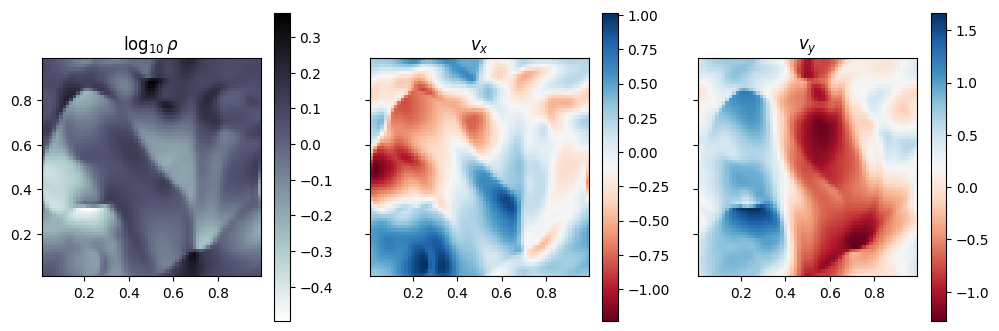

In [70]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 4))

axs[0].set_title(r"$\log_{10} \rho$")
axs[1].set_title(r"$v_x$")
axs[2].set_title(r"$v_y$")

t = None

plot_2d_slice(
    sim,
    axs[0],
    "rho",
    t=t,
    cell_averaged=True,
    func=lambda x: np.log10(x),
    colorbar=True,
    cmap="bone_r",
)
plot_2d_slice(sim, axs[1], "vx", t=t, cell_averaged=True, colorbar=True, cmap="RdBu")
plot_2d_slice(sim, axs[2], "vy", t=t, cell_averaged=True, colorbar=True, cmap="RdBu")

In [71]:
fig.savefig("MUSCL-Hancock_N=64.png", dpi=300, bbox_inches="tight")

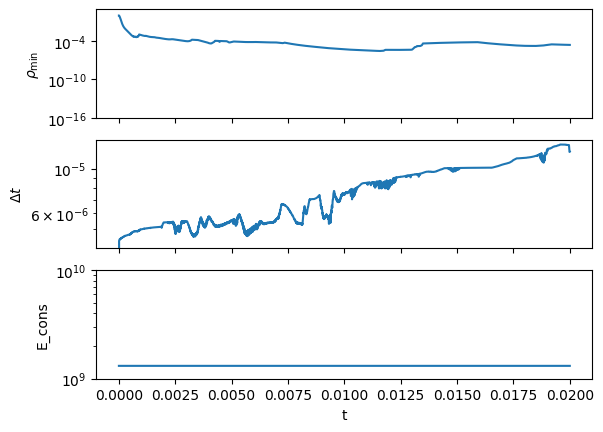

In [13]:
fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].set_ylabel(r"$\rho_{\min}$")
axs[0].set_ylim(1e-16, 10)
axs[0].set_yscale("log")

axs[1].set_ylabel(r"$\Delta t$")
axs[1].set_yscale("log")

axs[2].set_ylabel("E_cons")
axs[2].set_xlabel("t")
axs[2].set_yscale("log")

plot_timeseries(sim, axs[0], "rho_min", fine=True)
plot_timeseries(sim, axs[1], "dt")
plot_timeseries(sim, axs[2], "E_total")